# Ensemble equivalence

:::{admonition} **What you will learn**

- **Statistical Ensembles**: Understanding the role of ensembles in statistical mechanics and how they describe macroscopic systems using probability distributions.  
- **Microcanonical Ensemble (NVE)**: Definition, characteristics, and assumptions—fixed energy, volume, and particle number; statistical weight of microstates.  
- **Equivalence of Ensembles**: Conditions under which the microcanonical and canonical ensembles give equivalent thermodynamic predictions in the thermodynamic limit.  
- **Canonical Ensemble (NVT)**: Definition and significance—fixed temperature, volume, and particle number; derivation of the Boltzmann factor.  
- **Partition Function ($Z$)**: Role of the partition function in statistical mechanics, its connection to thermodynamic properties (free energy, entropy, internal energy).  
- **Boltzmann Distribution**: Probability of a system being in a given energy state at equilibrium, leading to macroscopic observables.  
- **Thermodynamic Connections**: How ensemble averages link to macroscopic properties such as energy, entropy, and pressure.  
- **Fluctuations and Large System Limits**: How energy fluctuations in the canonical ensemble become negligible for large systems, reinforcing ensemble equivalence.  
:::

![](./figs/ensembl.png)

### Microcanonical Ensemble (NVE)

- A collection of all possible microscopic arrangements consistend with an equilibrium thermodynamic state is called **statistical ensemble**. 
- Ensemble defines sample space over microstates over which we define micro and macro-state probabilities
- Consider an isolated fluid system with $N=const$, $V=const$ and $E=const$.  This is called a **microcanonical ensemble**
- In the absence of any physical constraints, no micro state is more probable than any other. This is known as "principle of equal a priory probability". 

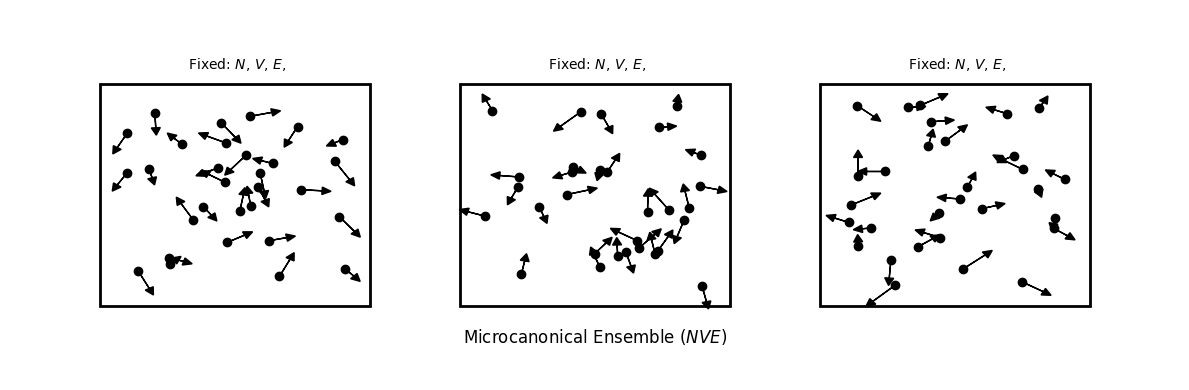

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw an isolated system (box with particles and motion arrows)
def draw_system(ax, x_offset=0):
    # Draw the box
    box = plt.Rectangle((x_offset, 0), 3, 3, edgecolor='black', linewidth=2, facecolor='none')
    ax.add_patch(box)
    
    # Fixed parameters label
    ax.text(x_offset + 1.5, 3.2, r' Fixed: $ N$, $V$, $ E$,', ha='center', fontsize=10)
    
    # Randomly place particles
    np.random.seed(x_offset)  # Ensure different particles per box
    num_particles = 30
    particle_positions = np.random.rand(num_particles, 2) * 2.5 + np.array([x_offset + 0.25, 0.25])

    for px, py in particle_positions:
        ax.plot(px, py, 'ko', markersize=6)  # Particles as black dots
        # Add motion arrows
        dx, dy = np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)
        ax.arrow(px, py, dx * 0.5, dy * 0.5, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Create figure
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 4)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Draw three isolated systems (microcanonical ensemble representation)
draw_system(ax, x_offset=0)
draw_system(ax, x_offset=4)
draw_system(ax, x_offset=8)

# Label the entire system
ax.text(5.5, -0.5, r'Microcanonical Ensemble ($NVE$)', ha='center', fontsize=12)

# Show plot
plt.tight_layout()



:::{admonition} **A priori equal probability**
:class: important

$$p(E) = \frac{1}{\Omega(N, V, E)}$$

- P(E) Probability of any microstate in the system with energy $E$
:::


:::{admonition} **Boltzmann equation**
:class: important

$$S = k_B log \Omega$$

- $\Omega$ is the number of micro-states **consistent with a macrostate of our system**. 
- $S(N, V, E)$ is the entropy of an isolated system (we are in the NVE). 
- $k_B =1.380649\cdot 10^{-23} J/K$,  Boltzmann's constant 

:::


#### Exchanging Energy

- Consider a **small system** in thermal contact with a **large reservoir** at temperature $ T $.  
- The **total system (system + reservoir) is isolated**, with a fixed at $ E_t $ hence we have a microcanonical ensemble.


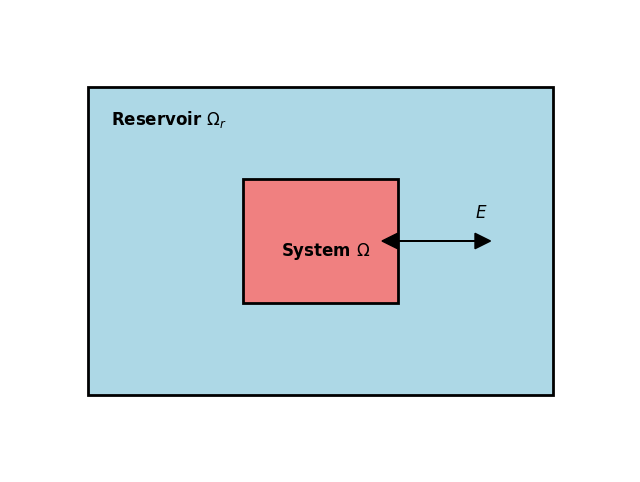

In [ ]:
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 5)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Draw the large reservoir (outer rectangle)
reservoir = plt.Rectangle((0, 0), 6, 4, edgecolor='black', facecolor='lightblue', linewidth=2, label="Reservoir (Ω_R)")
ax.add_patch(reservoir)

# Draw the small system (inner rectangle)
small_system = plt.Rectangle((2, 1.2), 2, 1.6, edgecolor='black', facecolor='lightcoral', linewidth=2, label="Small System (Ω_S)")
ax.add_patch(small_system)

# Annotate the system and reservoir
#ax.text(3, -0.5, r'\textbf{System with Reservoir: Energy Exchange}', ha='center', fontsize=12)
ax.text(0.3, 3.5, r'Reservoir $\Omega_r(E_t-E)$', fontsize=12, color='black', fontweight='bold')
ax.text(2.5, 1.8, r'System $\Omega(E)$', fontsize=12, color='black', fontweight='bold')

# Draw arrows indicating energy exchange
ax.arrow(4, 2, 1, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
ax.arrow(5, 2, -1, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')

# Label energy exchange
ax.text(5, 2.3, r'$E$', fontsize=12, color='black', fontweight='bold')

# Show plot
plt.show()



- The total number of microstates for the combined system is:  

  $$
  \Omega_t(E_t) = \sum_E \Omega(E) \Omega_r(E_t - E)
  $$

  where:  
  - $ \Omega(E) $ is the **number of microstates** available to the system when it has energy $ E $.  
  - $ \Omega_r(E_t - E) $ is the **number of microstates** available to the reservoir when the system has energy $ E $.  

- The probability of the system being in a **macrostate** that is, having energy $E$ is:  

  $$
  p(E) = \frac{\Omega(E) \Omega_r(E_t - E)}{\sum_E \Omega(E) \Omega_r(E_t - E)}
  $$

- The system is more likely to be in a macrostate $ E $ if the reservoir has **many ways** to accommodate the remaining energy $ E_t - E $.  

### Constant temperature ensemble (NVT)

- Since the reservoir is **much larger than the system** $ E \ll E_t $, its entropy or log of microstates is a **smooth function** of energy:

  $$log\Omega_r(E_t-E) \approx log\Omega_r(E_t)  - \frac{\partial log \Omega_r}{\partial E}E = const  - \beta E$$

- First factor is constnatn independent of energy and the reservoir influence is now only described by the coefficient which is related to temperature!
 
$$\beta  = \frac{1}{k_B}\frac{dS}{dE}=\frac{1}{k_BT}$$ 

- We find that number of microstates of large reservoir decrease exponentially when system borrows energy $E$

$$
\Omega_r(E_t - E) \sim e^{- \beta E}
$$

:::{admonition} **Boltzmann distribution (NVT)**
:class: important

**Probability of a Macrostate**

$$
  p(E) = \frac{\Omega(E) e^{-\beta E}}{Z}
$$

**Probability of a Microstate**

$$
  p_i = \frac{e^{-\beta E_i}}{Z}
$$

**Parition Function**

$$
  Z = \sum_E \Omega(E) e^{-\beta E} = \sum_i e^{-\beta E_i} 
$$

- The **partition function** $Z$ keeps the normalization of the ratio and is a sum over all micro or macrostates weighted by exponential Boltzman factor.  
:::

:::{admonition} **MaxEnt Derivation of NVT**
:class: tip

We can derive the Botlzman distribution by Maximizing Entropy with a constraint placed on fixed average energy $\langle E\rangle =U$ 


:::

### Partition Functions and Thermodynamic limit

$$Z =  \sum_E \Omega(E) e^{-\beta E} = \sum_E  e^{-\beta (E-TS)}$$

- The number of states **grows exponentially** with system size $ N $, $ \Omega(E) = e^{\frac{S}{k_B}} \sim e^{N}$ while the Boltzmann factor **decays exponentially** with energy $e^{-\beta E} \sim e^{-N}$
- These competing exponential behaviors determine the **dominant contribution** to the partition function.
- In the **thermodynamic limit** (large $ N $ and $ V $), only energies that **significantly contribute** to $ Z $ survive. This allows rewriting the integral as:  

$$
Z \approx e^{\min_E [-\beta (E - TS)]} = e^{-\beta(U - TS)} = e^{-\beta F}
$$

where:

  - $ U = \langle E \rangle $ is the **average energy**, with fluctuations of order $ O(N^{1/2}) $.
  - $ F = U - TS $ is the **Helmholtz free energy**.




### **Derivation of Average Energy and Fluctuations**

- The probability of the system being in microstate  i  is given by the Boltzmann distribution:

$$
P_i = \frac{e^{-\beta E_i}}{Z}, \quad Z = \sum_i e^{-\beta E_i}
$$

$$
\langle E \rangle = \sum_i P_i E_i = \frac{1}{Z} \sum_i E_i e^{-\beta E_i} 
$$

- The ensemble average energy can be related to the  derivative of log of partition function:

$$
 \langle E \rangle= -\frac{1}{Z} \frac{\partial Z}{\partial \beta} = -\frac{\partial \ln Z}{\partial \beta}
$$

:::{admonition} **Moments of Energy in NVT ensemble**
:class: important

$$
\langle E\rangle  = -\frac{\partial \ln Z}{\partial \beta}
$$

$$
  \sigma_E^2 = \langle E^2 \rangle - \langle E \rangle^2 = \frac{\partial^2 \ln Z}{\partial \beta^2}
$$

:::

### Fluctuation-response and ensemble equivalence

- We can now show that heat capaicty is related to energy fluctuations a result known as fluctuation-response theorem

$$
C_V = \left( \frac{\partial \langle E \rangle}{\partial T} \right)_V = - k_B \beta^2 \frac{\partial^2 \ln Z}{\partial \beta^2}
$$


:::{admonition} **Fluctuation-Response Theorem**
:class: important

$$\sigma_E^2 = k_B T^2 C_V $$

:::


- Relative energy fluctuations scale as:

  $$
  \frac{\sigma_E}{\langle E \rangle} = \frac{(k_B T^2 C_V)^{1/2}}{\langle E \rangle} \sim O(N^{-1/2})
  $$

- In the thermodynamic limit $N\rightarrow \infty $, fluctuations become negligible, justifying **ensemble equivalence**.

### Example-1: A two-state model in NVE vs NVT ensemble

- **NVE**
Let us consider a simple two-level system where lower level $\epsilon_0 = 0$ and upper level $\epsilon_1 =\epsilon$. We will now use $NVE$ ensemble to obtain thermodynamic quantities $(S, T, C_v)$ and then obtain the same quantities with $NVT$.

$$E = n\epsilon$$

$$\Omega(E) = \frac{N!}{(N-n)! n!}$$

$$S = k_B log \Omega(E) = N k_B \Big [- \frac{n}{N}log \frac{n}{N} - \frac{N-n}{N}log \frac{N-n}{N} \Big]$$

$$\frac{1}{T} = \frac{\partial S(E)}{\partial E} =  \frac{k_B}{\epsilon}\frac{\partial log\Omega(n)}{\partial  n} = \frac{k_B}{\epsilon}log \frac{N-n}{N}$$

$$\frac{n}{N} = \frac{1}{1+e^{\beta \epsilon}}$$

$$E = n\epsilon = \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

- **NVT** Solving a two-state system in an NVT ensemble is much easier because the partition function decouples into single particle contributions. 

$$Z = \sum^{n=N}_{n=0} e^{-\beta E_n}  = (1+e^{-\beta \epsilon})^N$$

$$F= -k_B T log Z = -k_BT N log(1+e^{-\beta \epsilon})$$


$$\langle E \rangle  = \frac{\partial log Z}{\partial (-\beta)} =  \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

#### Example-2 Non-interacting spins 

#### NVE

- Consider a single spin atom under an external magnetic field $B$. The system can be in two states with energy $\epsilon = −m_z B$ where $m_z=\pm \mu$ is the spin magnetic number and $\mu$ magnetic moment of the spin. Generalizing to N spins is straightforward
- $N= N_{\uparrow} + N_{\downarrow}$ **total number of spins**
- $M =  N_{\uparrow} - N_{\downarrow}$ **overall magnetization**
- $m = M/n$ **magnetization per spin** ranging from -1 to +1.
- The energy is sum of independent spin energies $E = \sum^N_i  \epsilon_i = -N_{\uparrow}\mu B + N_{\downarrow}\mu B = -\mu B (N_{\uparrow} - N_{\downarrow}) = -\mu M B$.  
- To find number of microstates for a given $E$ we need to find a number of ways to partition $N_{\uparrow}$ and $N_{\downarrow}$ spins. 

$$\Omega(N, N_{\uparrow}) = \frac{N!}{N_{\uparrow}! N_{\downarrow}!}  = \frac{N!}{[1/2(N+M)!] [1/2(N-M)!]}$$

$${\Omega (E,N)= \frac{N!}{\Big[\frac{1}{2}(N-E/B\mu)\Big]! \Big[\frac{1}{2}(N+E/B\mu)\Big]!}}$$

$$S = Nk_B \Big[log 2 - \frac{1}{2}log(1-m^2)-\frac{m}{2} log \frac{1+m}{1-m} \Big]$$

 -  Find temperature dependence by using $\frac{1}{T} = \frac{\partial S}{\partial E}|_N$

$$U = -\mu N B tanh \Big(\frac{\mu B}{k_B T} \Big)$$

- magnetization per spin $m=-U/\mu NB$ is given by:

$$m = tanh \Big(\frac{\mu B}{k_B T} \Big)$$

#### NVT

**Partition function of a single spin**

$$Z_1 = \sum_{s_1} e^{\beta \mu B s_1} = e^{\beta \mu B} + e^{-\beta \mu B}  = 2 cosh(\beta \mu B)$$

**Partition function of N spins**

$$Z =Z_1^N$$

**Free energy** 

$$ F(T, B) = - \beta^{-1} log Z = - N \beta^{-1} log \Big [ 2 cosh (\beta \mu B )  \Big ]$$

**Entropy**

$$S = - \Big(\frac{\partial F}{\partial T} \Big)_B = k_B log \Big [ 2 cosh (\beta \mu H )  \Big ] - k_B (\beta \mu B)\cdot tanh (\beta \mu B)$$

**Magnetization**

Magnetization $M$ (extensive quantity) or magnetization per particle $m=M/N$ (intensive quantity) is given as another free energy derivative:

$$M = - \Big(\frac{\partial F}{\partial B} \Big)_T = \mu tanh \Big(\beta \mu B \Big)$$

**Magnetizatic susceptibility**

In the context of paramagnet, we have another response function in the form of magnetic susceptibility.

$$\chi(T, B) =  \Big(\frac{\partial m}{\partial B} \Big)_T = \mu^2 \beta B cosh^{-2} (\beta \mu B)$$

which leads to a well-known **Curie Law**

$$\chi(T, B=0) = \frac{\mu^2 }{k_B T}$$

Finally, as a consistency check we can combine entropy and free energy expressions to obtain internal energy:

$$U = F+TS = -\mu B tanh(\beta \mu B)$$

### Problems

### Shottky defects

Schotky defects are vacancies in a lattice of atoms. Creating a single vacancy costs an energy $\epsilon$.  Consider a lattice with $N$ atoms and $n$ vacacnies. In this model the total energy is solely a function of defects: $E=n\epsilon$

- Write down number of states and compute the entropy via Boltzmann formula. Plot number of states as a function of energy. You can use log of number of states for plotting. 

- Compute how the temperature would affect the fraction of vacancies on the lattice. Plot fraction of vacancies as a function of temperature. 

- How would the total energy depend on temperature $T$. Derive expression for the high temeprature limit ($\frac{\epsilon}{k_b T} \gg 1$). 
  
- Plot total energy as a function of temperature E(T)

#### Lattice gas

Consider a lattice gas of N particles distributed among V cells (with $N\geq V$). Suppose that each cell may be either empty or occupied by a single particle. The number of microscopic states of this syste will be given by:

$$\Omega (N, V) = \frac{V!}{N! (V-N)!}$$

- Obtain an expression for the entropy per particle $s(v)=\frac{1}{N} \cdot S(N,V)$ where $v=\frac{V}{N}$. 
- From this simple fundamental equation, obtain an expression of equation of state $p/T$. 
- - Write an expansion of $p/T$ in terms of density $1/v$. Show that the first term gives Boyle law of ideal gases. 
- Sketch a graph of $\mu/T$, where $\mu(\rho)$ is a chemical potential as a function of density. Comment on $\rho\rightarrow 0$ and $\rho\rightarrow 1$ limits.


### Polymer Elasticity

> Solve the problem 2.7  from the book.